# Chaikin Money Flow
- Chaikin Money Flow (CMF) เป็นดัชนีการไหลของเงิน (Money Flow) ที่ถูกพัฒนาโดย Marc Chaikin โดยดัชนีนี้ใช้ในการวิเคราะห์แรงซื้อและแรงขายในตลาดโดยพิจารณาจากปริมาณการซื้อขาย (volume) และการเคลื่อนไหวของราคา (price movement) ดัชนีนี้จะช่วยระบุว่านักลงทุนกำลังซื้อ (accumulation) หรือขาย (distribution) สินทรัพย์ในช่วงระยะเวลาหนึ่ง

In [6]:
import sys
import os

# กำหนด path ไปยังโฟลเดอร์ 'libs' ที่อยู่ข้างนอกของ 'subfolder'
# ใช้ os.path.abspath สำหรับการรับ absolute path
libs_path = os.path.abspath(os.path.join(os.getcwd(), '../..', ''))

# ใส่ path นี้ไปที่ตำแหน่งแรกใน sys.path เพื่อให้ Python ค้นหาที่นี่ก่อน
if libs_path not in sys.path:
    sys.path.insert(0, libs_path)

import starfishXapi as sx
from starfishXapi.set_api import indexType
sx.enable_autoreload()
print(sx.__version__)

Autoreload enabled.
0.00104


In [8]:
# สร้าง object dataReader
dataReader = sx.HistStockPrice()
dataReader.openLog(directory='cache/') # สร้าง folder cache/

*you are using nologin method, data you access may be limited


True

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

start_date = '2024-01-01'
stop_date = '2024-10-01'  
folder = 'cache/'

symbol = 'dusit'
df = dataReader.getPrice(symbol,start=start_date,stop=stop_date,cache=True)
df.tail(5)

open  high   low  close     volume
Date                                          
2024-09-25  12.3  12.4  12.1   12.3   427210.0
2024-09-26  12.2  12.2  11.9   12.2   419031.0
2024-09-27  12.2  12.4  11.4   11.6  2547970.0
2024-09-30  11.6  11.6  11.3   11.4  1291519.0
2024-10-01  11.4  11.5  11.3   11.5   366519.0

ตัวอย่างผลลัพธ์
![image](indicator_images/chaikin01.png)

![image](indicator_images/chaikin02.png)

การตีความ Chaikin Money Flow (CMF):<br>

CMF > 0: เมื่อค่าของ CMF เป็นบวก แสดงว่ามีแรงซื้อเข้ามามากกว่าแรงขายในช่วงระยะเวลานั้น ซึ่งเป็นสัญญาณบวกต่อตลาด<br>
CMF < 0: เมื่อค่าของ CMF เป็นลบ แสดงว่ามีแรงขายมากกว่าแรงซื้อในช่วงระยะเวลานั้น ซึ่งเป็นสัญญาณลบต่อตลาด<br>
Overbought/ Oversold: หากค่า CMF ขยับเข้าใกล้ 1 หรือ -1 อย่างต่อเนื่อง อาจบ่งบอกถึงภาวะตลาดที่ Overbought (ซื้อมากเกินไป) หรือ Oversold (ขายมากเกินไป)

In [192]:
import pandas as pd

def chaikin_money_flow(df, period: int = 20):
    """
    Calculate Chaikin Money Flow (CMF) Indicator.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'High', 'Low', 'Close', and 'Volume' columns
    period (int): The period to calculate CMF

    Returns:
    pd.Series: CMF values
    """
    # Calculate the Money Flow Multiplier
    mf_multiplier = ((df['close'] - df['low']) - (df['high'] - df['close'])) / (df['high'] - df['low'])
    
    # Calculate Money Flow Volume
    mf_volume = mf_multiplier * df['volume']
    
    # Calculate Chaikin Money Flow
    cmf = mf_volume.rolling(window=period).sum() / df['volume'].rolling(window=period).sum()
    
    return cmf

In [196]:
def plot_chaikin_money_flow(df,cmf,symbol,start_date,stop_date,day=14):
    fig , ax1 = plt.subplots(figsize=(12,5))
    
    ax1.axhline(0.1,linewidth=0.8,linestyle='--',color='red',alpha=0.8)
    ax1.axhline(0,linewidth=0.8,linestyle='--',color='black',alpha=0.8)
    ax1.axhline(-0.1,linewidth=0.8,linestyle='--',color='red',alpha=0.8)
    
    ax1.plot(cmf.index,cmf,label='CMF')

    sma = cmf.rolling(window=day).mean()
    ax1.plot(sma.index,sma,label=f'CMF SMA{day}')
    
    ax1.set_title(f'{symbol.upper()} : Close Price V.S. Chaikin Money Flow  ({start_date} - {stop_date})')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    
    ax2.plot(df.index,df['close'],color='green',label=symbol.upper())
    ax2.set_xticks([])
    #ax2.legend(loc=(0.01, 0.85))
    #ax1.legend(loc=(0.01, 0.70))
    ax2.legend(bbox_to_anchor=(1.04, 1), loc='upper left', borderaxespad=0.)
    ax1.legend(bbox_to_anchor=(1.04, 0.9), loc='upper left', borderaxespad=0.)
    plt.show()

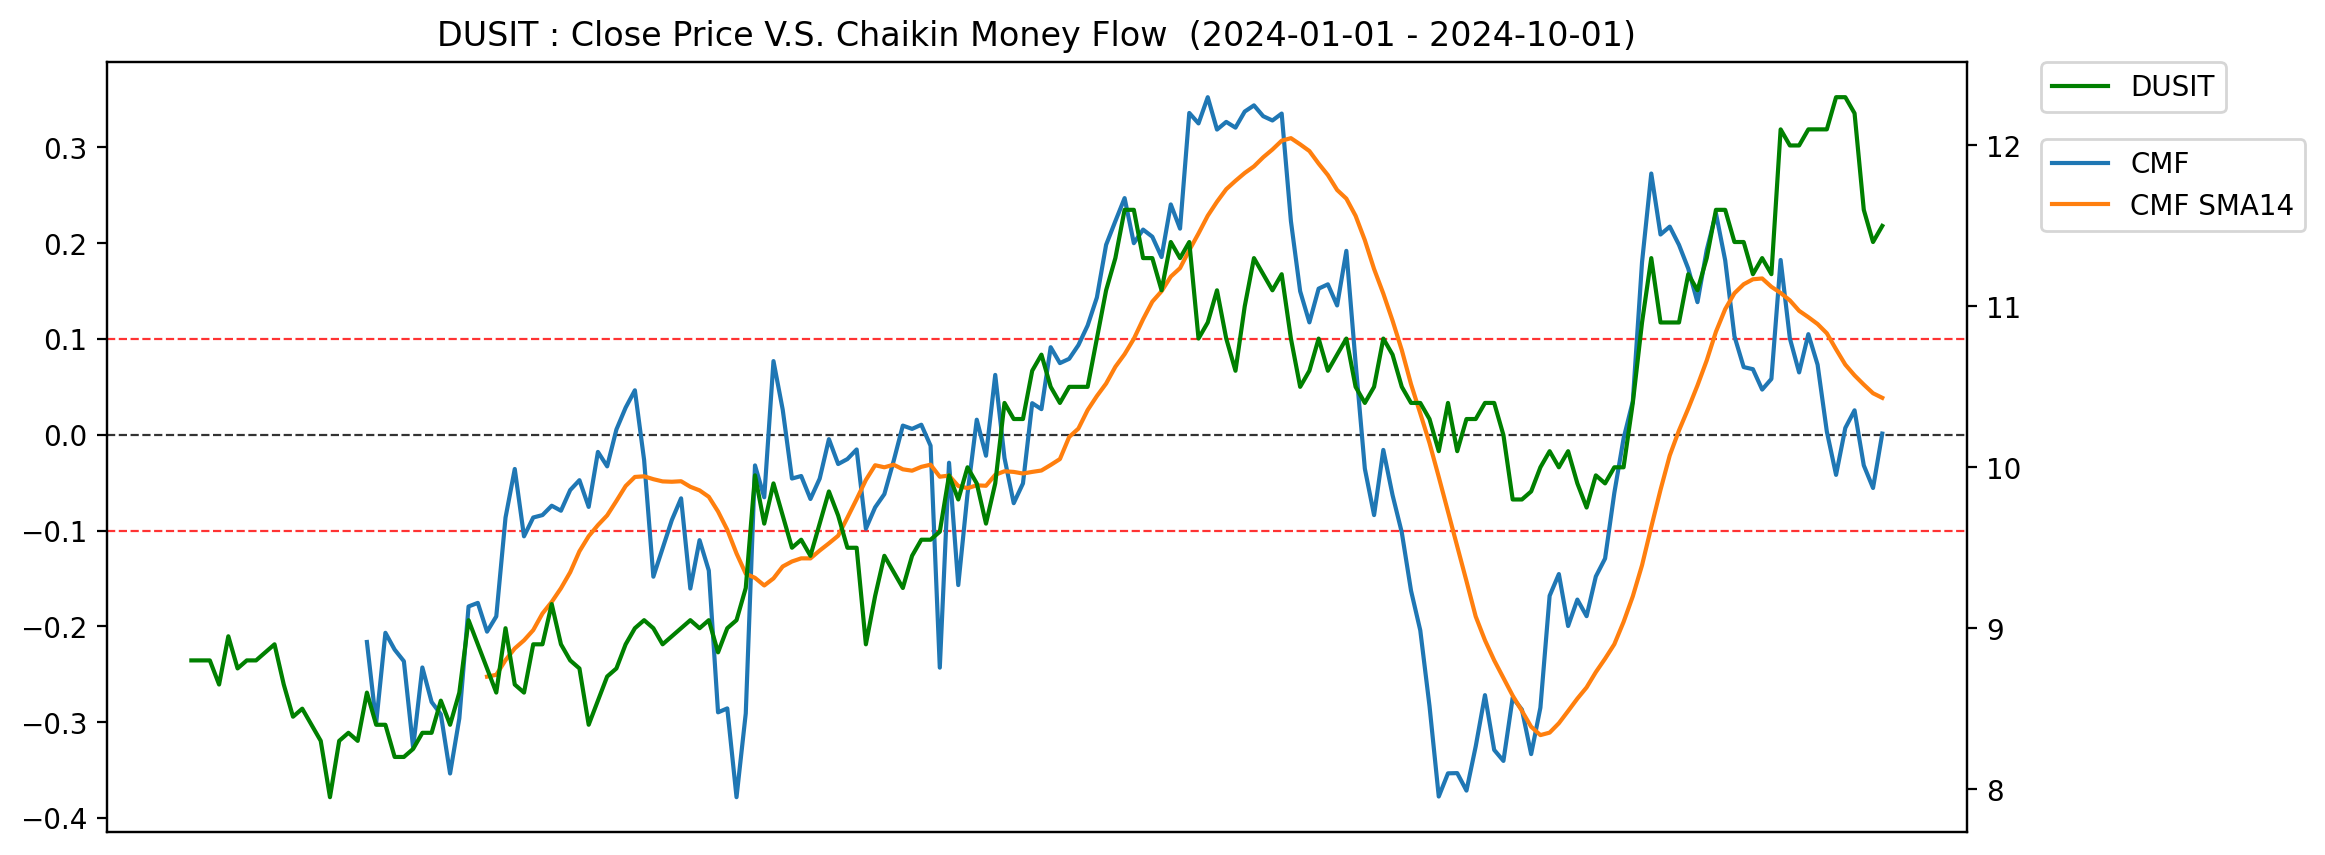

In [198]:
symbol = 'dusit'
df = dataReader.getPrice(symbol,start=start_date,stop=stop_date,cache=True)

cmf = chaikin_money_flow(df)
plot_chaikin_money_flow(df,cmf,symbol,start_date,stop_date)

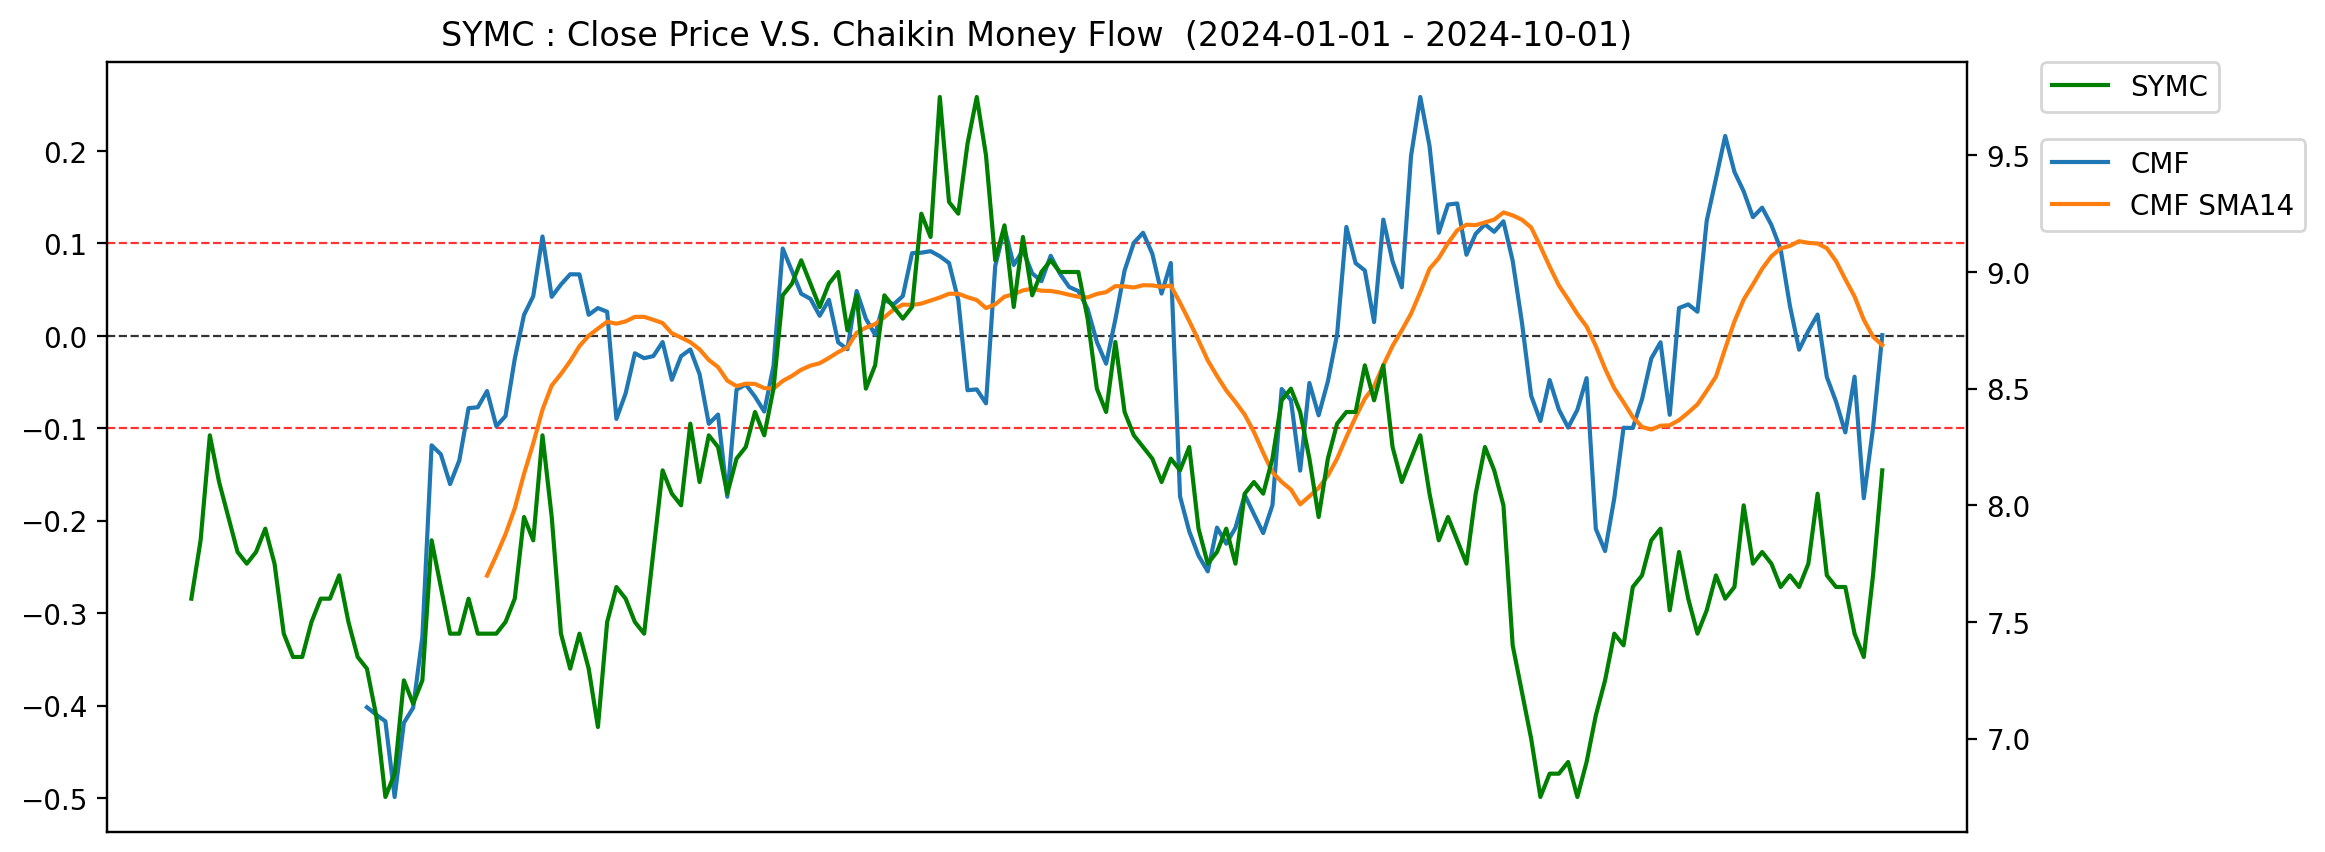

In [200]:
symbol = 'symc'
df = dataReader.getPrice(symbol,start=start_date,stop=stop_date,cache=True)

cmf = chaikin_money_flow(df)
plot_chaikin_money_flow(df,cmf,symbol,start_date,stop_date)

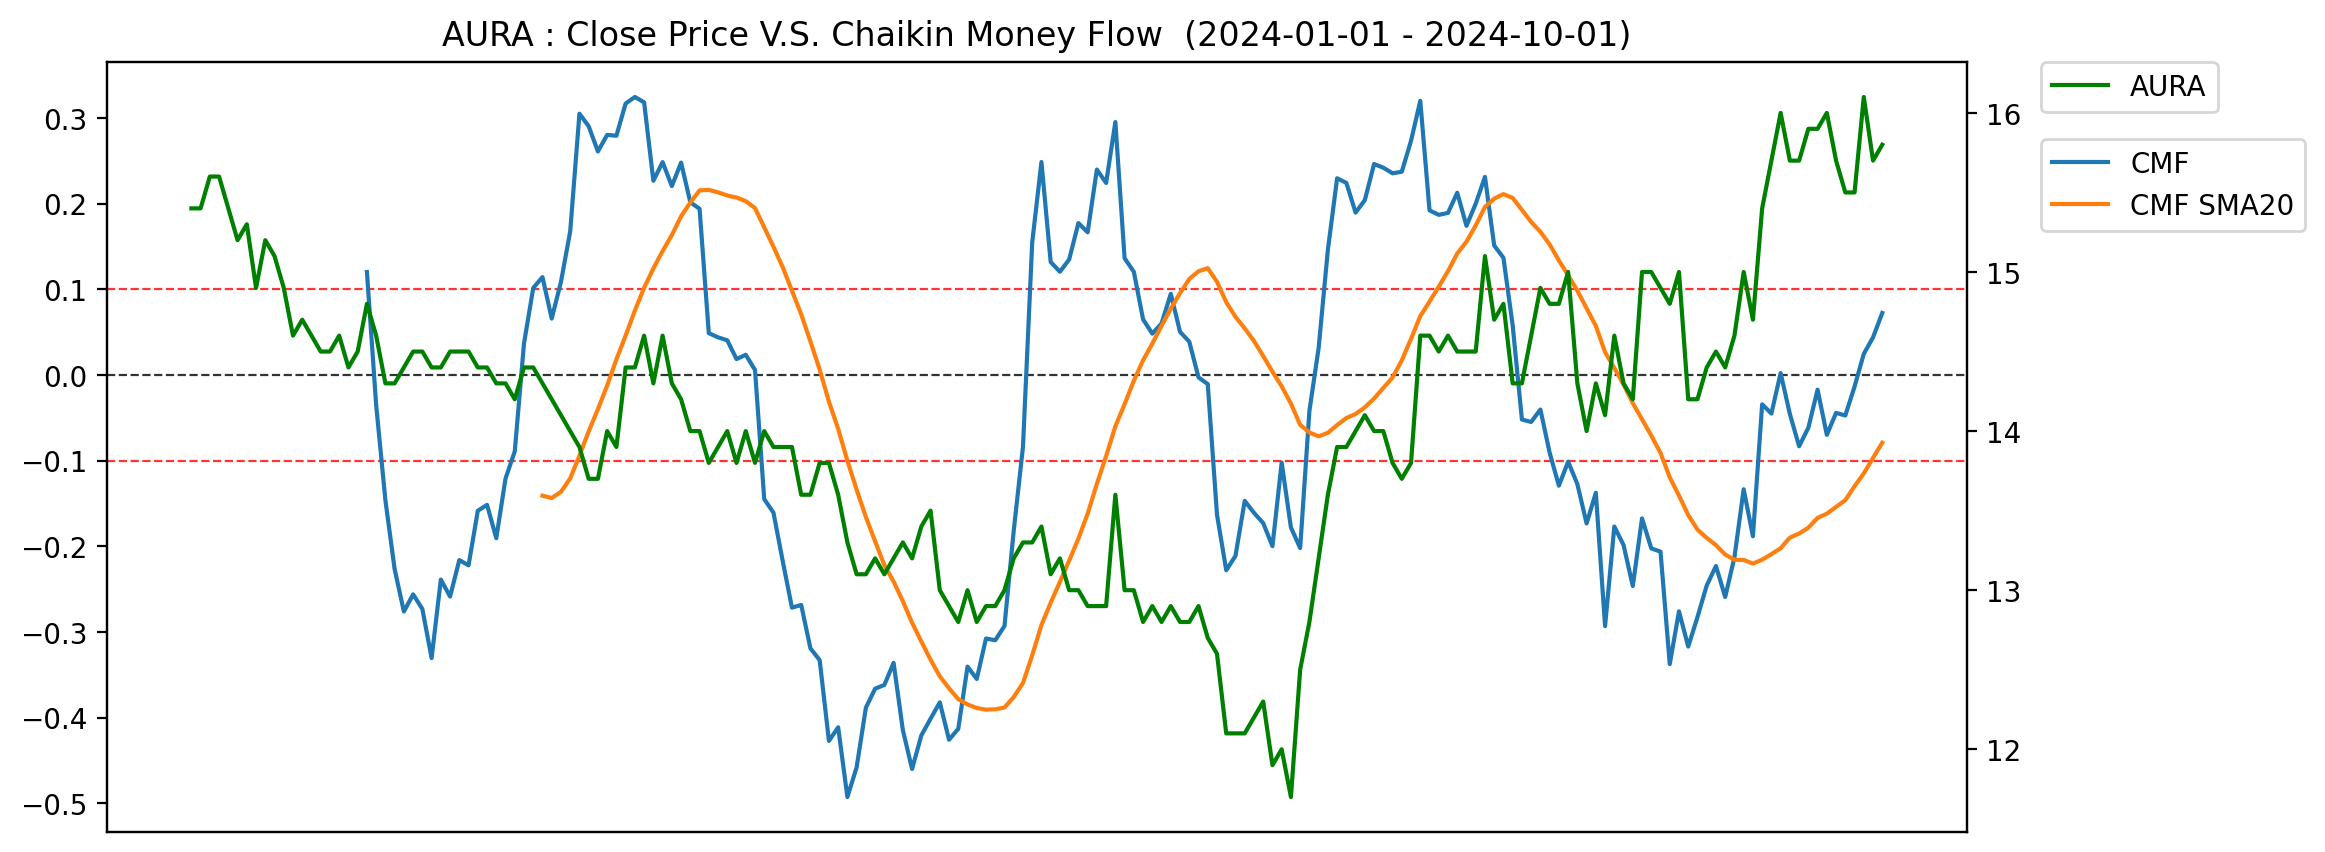

In [216]:
# Chaikin Money Flow จำนวน 20 วัน
symbol = 'aura'
df = dataReader.getPrice(symbol,start=start_date,stop=stop_date,cache=True)

cmf = chaikin_money_flow(df,period=20)
plot_chaikin_money_flow(df,cmf,symbol,start_date,stop_date,day=20)